# Shardul Nazirkar

Github - shardul1704

# Classification on APS Failure at Scania Trucks Data Set

https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks

## Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings('ignore')

## 1. (a) Importing the dataset

In [3]:
df1 = pd.read_csv('../data/aps_failure_training_set.csv',skiprows=20)
df2 = pd.read_csv('../data/aps_failure_test_set.csv',skiprows=20)
df3 = pd.concat([df1, df2], axis=0)
df3

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


## 1. (b) i. Data imputation

The following are the techniques usually used for dealing with data with missing values:

Imputation Using (Mean/Median) Values

Imputation Using (Most Frequent) or (Zero/Constant) Values

Imputation Using k-NN

Imputation Using Multivariate Imputation by Chained Equation (MICE)

Imputation Using Deep Learning (Datawig)

Stochastic regression imputation

Extrapolation and Interpolation

Hot-Deck imputation

In [4]:
# df3['class']=df3['class'].map({'neg':0,'pos':1})
df3 = df3.replace('na', np.nan)
# df3
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df3)
df4 = pd.DataFrame(imp.fit_transform(df3))
df4.columns = list(df3.columns)
df4

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,0,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,neg,79636,0,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,neg,110,0,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [5]:
df4['class']=df4['class'].map({'neg':0,'pos':1})
df4

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,0,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,0,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,0,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,0,81852,0,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,0,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,0,79636,0,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,0,110,0,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [6]:
X = df4.drop('class', axis = 1)
y = df4['class']
X_train , X_test = X[:70000], X[70000:]
y_train , y_test = y[:70000], y[70000:]
X

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,76698,0,2130706438,280,0,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,33058,0,0,0,0,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,41040,0,228,100,0,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,12,0,70,66,0,10,0,0,0,318,...,240,46,58,44,10,0,0,0,4,32
4,60874,0,1368,458,0,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,81852,0,2130706432,892,0,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,18,0,52,46,8,26,0,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,79636,0,1670,1518,0,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,110,0,36,32,0,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [7]:
X=X.astype(float)
y=y.astype(float)
X_train=X_train.astype(float)
X_test=X_test.astype(float)
y_train=y_train.astype(float) 
y_test=y_test.astype(float)

## 1. (b) ii. Coefficient of Variation

In [8]:
CoVar = lambda x: np.std(x, ddof=1) / np.mean(x) * 100
CoVars = np.array(X.apply(CoVar))
CoVars_df = pd.DataFrame(CoVars, index=list(X.columns), columns=['CV'])
CoVars_df

,CV
aa_000,432.860784
ab_000,974.052141
ac_000,230.929928
ad_000,27486.735441
ae_000,2327.135688
...,...
ee_007,494.236854
ee_008,337.504384
ee_009,582.100765
ef_000,5022.368123


## 1. (b) iii. Correlation Matrix

In [9]:
matrix = X.corr()
matrix

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.009953,-0.037851,-0.000801,0.023778,0.033524,0.011686,0.076387,0.195179,0.307466,...,0.413890,0.419665,0.409433,0.419590,0.425537,0.356942,0.259621,0.133790,0.005648,0.009239
ab_000,0.009953,1.000000,-0.002489,-0.000373,0.034129,0.053156,-0.000206,0.006841,0.024010,0.037640,...,-0.000160,0.011054,0.002015,0.012209,0.016227,0.010767,-0.026311,-0.017057,0.051733,0.077262
ac_000,-0.037851,-0.002489,1.000000,-0.001568,-0.004005,-0.009773,0.015077,-0.007137,-0.022578,-0.046973,...,-0.046572,-0.040152,-0.039707,-0.040638,-0.047250,-0.048768,-0.004768,0.012019,-0.006200,0.016273
ad_000,-0.000801,-0.000373,-0.001568,1.000000,-0.000155,-0.000190,-0.000038,-0.000085,-0.000202,-0.000407,...,-0.001334,-0.001341,-0.001309,-0.001085,-0.001051,-0.000721,-0.001060,-0.000622,-0.000072,-0.000076
ae_000,0.023778,0.034129,-0.004005,-0.000155,1.000000,0.830001,-0.000465,-0.000953,0.000977,0.018881,...,0.009877,0.016817,0.010372,0.023880,0.063891,0.034169,-0.009516,-0.007330,0.063622,0.030893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356942,0.010767,-0.048768,-0.000721,0.034169,0.043477,0.007654,0.067997,0.181948,0.475600,...,0.442611,0.433335,0.420067,0.380585,0.543740,1.000000,0.227619,0.063439,-0.001546,-0.000358
ee_008,0.259621,-0.026311,-0.004768,-0.001060,-0.009516,-0.012223,0.000103,0.005364,0.009143,0.020930,...,0.443235,0.471245,0.449080,0.394728,0.366346,0.227619,1.000000,0.690267,-0.005661,-0.002473
ee_009,0.133790,-0.017057,0.012019,-0.000622,-0.007330,-0.009004,-0.001082,-0.003530,-0.009065,-0.018009,...,0.225112,0.236362,0.221310,0.184369,0.159082,0.063439,0.690267,1.000000,-0.003312,-0.001216
ef_000,0.005648,0.051733,-0.006200,-0.000072,0.063622,0.093517,-0.000086,0.000960,0.005119,0.010094,...,0.002313,0.008901,0.001793,0.025669,0.004015,-0.001546,-0.005661,-0.003312,1.000000,0.222595


## 1. (b) iv. Plots

In [10]:
sorted_index_array = np.argsort(CoVars)
CoVars[sorted_index_array[-13:]]

array([ 7835.08684967,  7889.55076016,  8487.51462502,  8699.22482058,
        9250.7510269 , 11508.20770422, 11938.44108189, 12075.95044398,
       13091.52328422, 19472.09367255, 27486.73544109, 27507.29571356,
       27559.70290212])

In [11]:
highCoVar = df4.iloc[:,sorted_index_array[-13:]]
highCoVar['class']=df4['class']
highCoVar

,ay_008,az_008,aj_000,at_000,af_000,ar_000,de_000,dg_000,di_000,cs_008,ac_000,cn_009,ce_000,class
0,755876,0,0,0,0,0,1126,0,0,118,2130706438,1608,246244,0
1,99560,0,68,0,0,0,522,0,0,22,0,56,0,0
2,1450312,0,0,0,0,0,152,0,0,246,228,28,63328,0
3,5596,0,0,0,10,0,62,0,0,0,70,0,302,0
4,584074,0,226,0,0,0,444,0,0,204,1368,86,135720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,351926,0,0,1536,0,0,1006,0,0,56,2130706432,1328,162502,0
75996,10358,0,0,0,26,0,66,0,0,0,52,0,450,0
75997,14816,0,0,1828,0,0,456,0,0,576,1670,842,194480,0
75998,17646,0,0,0,0,0,38,0,0,60,36,0,1194,0


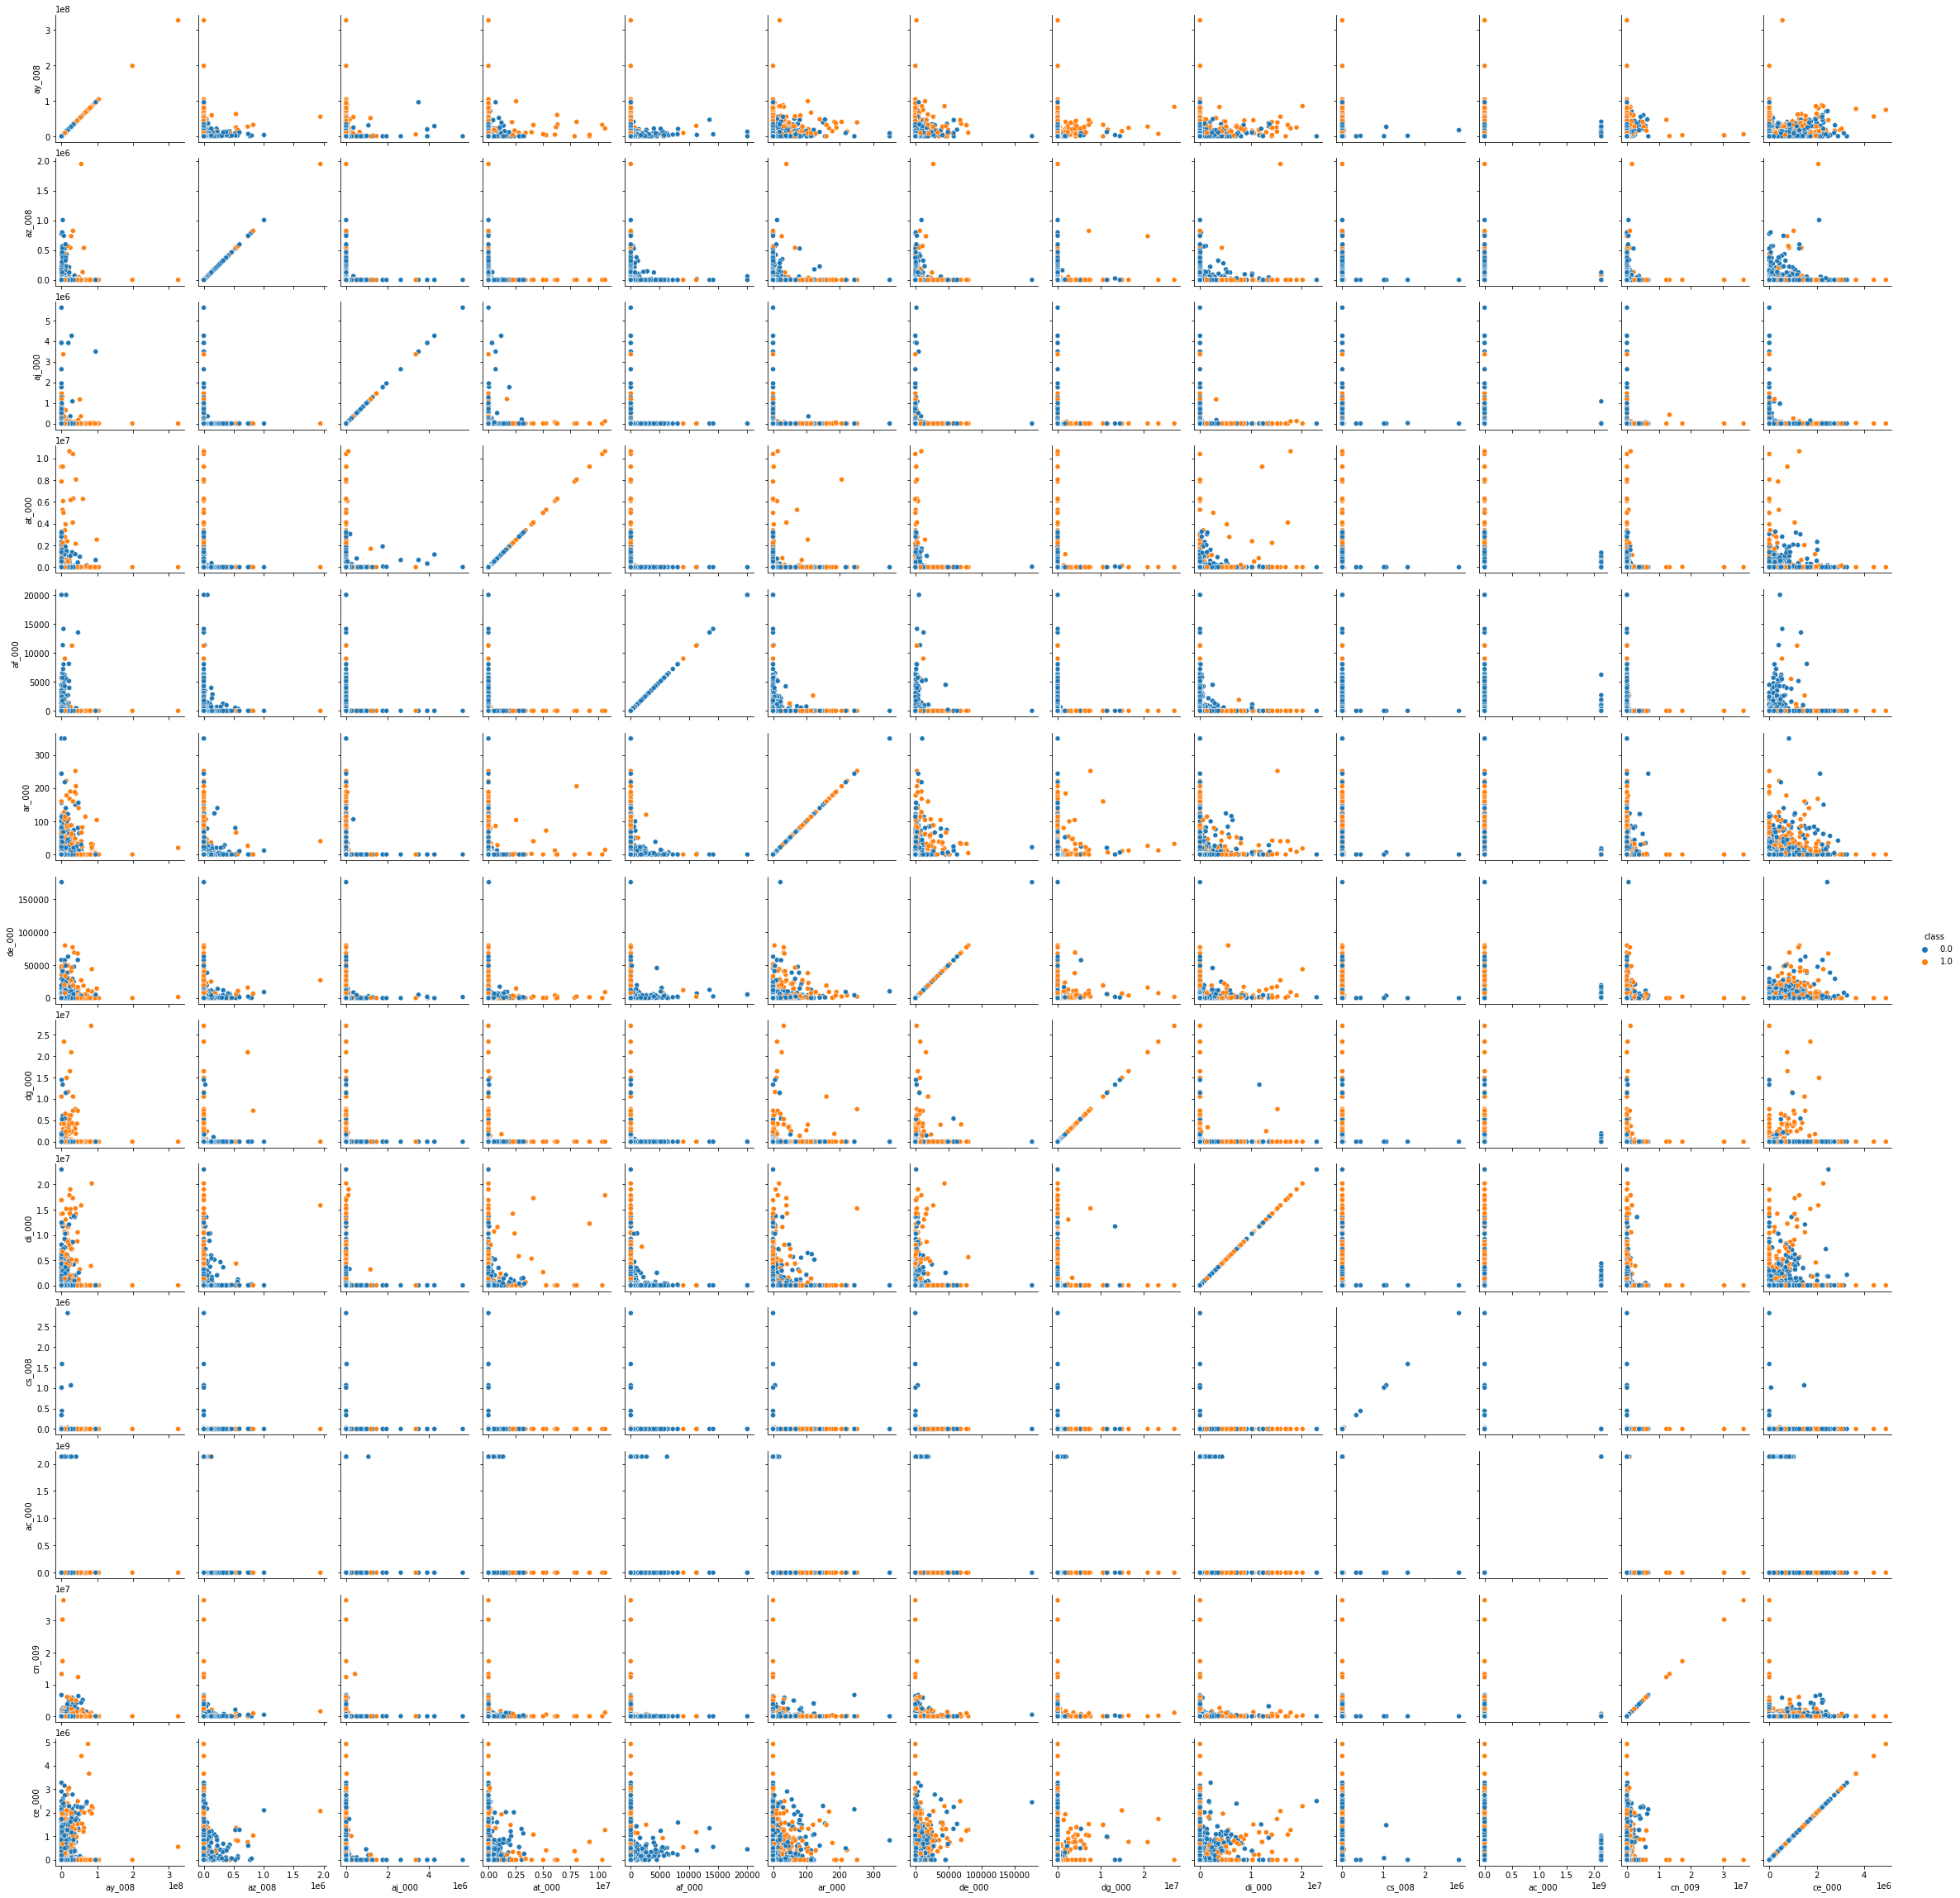

In [68]:
highCoVar=highCoVar.astype(float)
sns.pairplot(highCoVar,kind="scatter",hue='class',diag_kind=None)

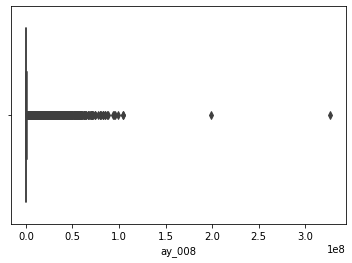

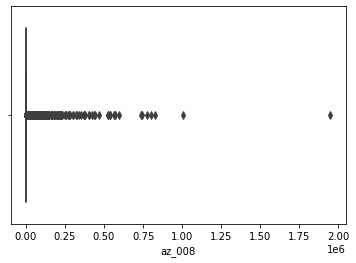

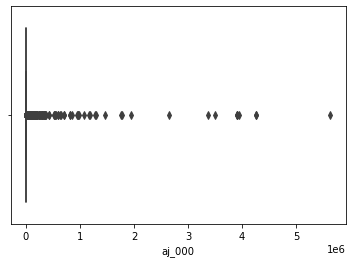

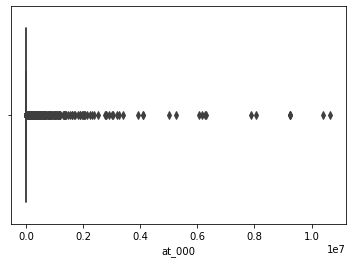

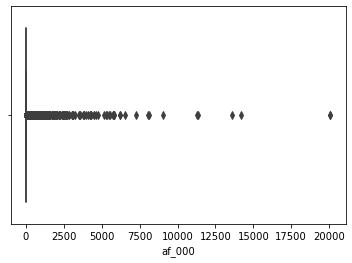

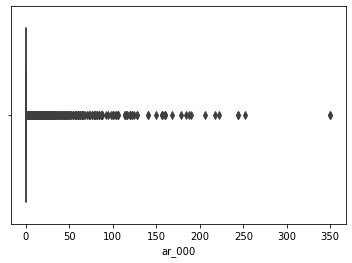

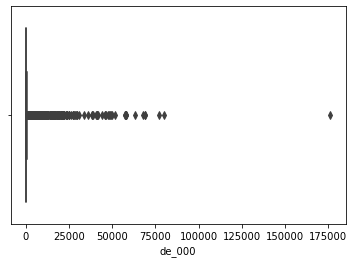

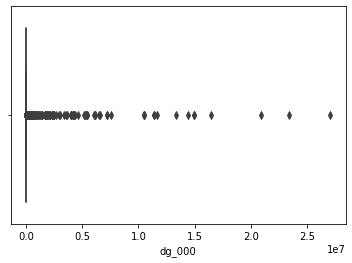

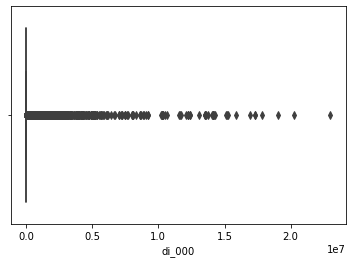

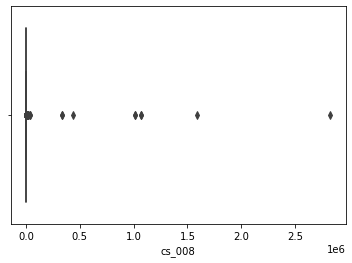

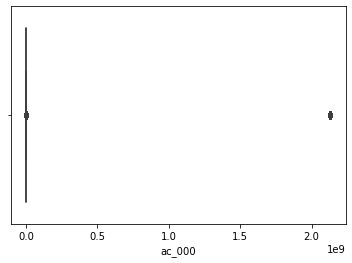

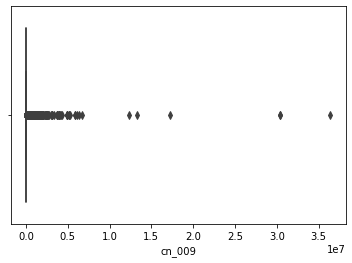

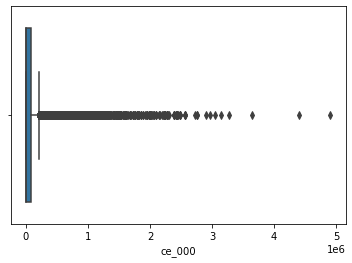

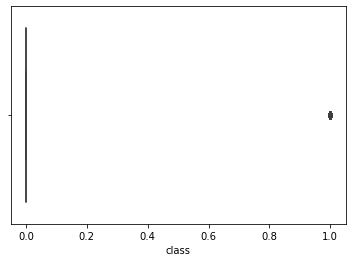

In [74]:
for i in highCoVar.columns:
    sns.boxplot(data = highCoVar,x=highCoVar[i],hue='class')
    plt.show()

From the scatterplots, I can see that there are some correlated predictors - for example, ar000 and cr000 are almost perfectly linearly correlated, while af000 and cr000 are very closely correlated. The rest of the attributes are either weakly linearly correlated or do not appear correlated at all.

## 1. (b) v. Number of positive and Negative data

In [12]:
y_train.value_counts()

0.0    68760
1.0     1240
Name: class, dtype: int64

There are 68760 negative values and only 1240 positive values. The dataset is very much imbalanced.

## 1. (c) Random Forest Classifier

In [13]:
clf = RandomForestClassifier(n_estimators = 50) 
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
print("Train Accuracy ", metrics.accuracy_score(y_train, y_train_pred))

Train Accuracy  0.9999857142857143


In [14]:
y_pred = clf.predict(X_test)
print("Test Accuracy ", metrics.accuracy_score(y_test, y_pred))

Test Accuracy  0.9916666666666667


Confusion Matrix for Training set


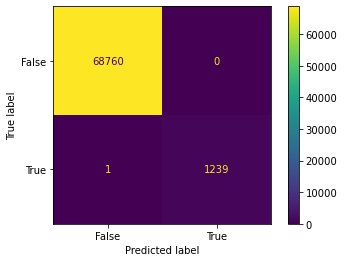

In [15]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
print('Confusion Matrix for Training set')
cm_display.plot()
plt.show() 

Confusion Matrix for Test set


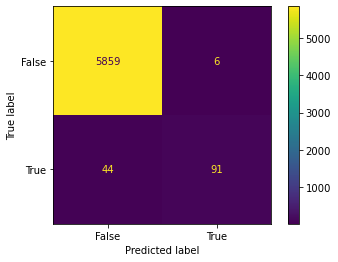

In [16]:
confusion_matrix1 = metrics.confusion_matrix(y_test, y_pred)
cm_display1 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1, display_labels = [False, True])
print('Confusion Matrix for Test set')
cm_display1.plot()
plt.show() 

ROC, AUC for Training set


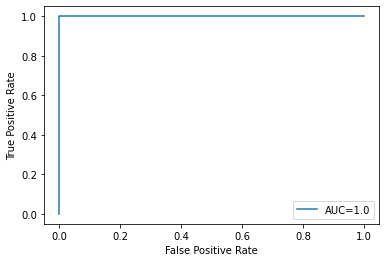

In [17]:
y_pred_train_proba = clf.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_proba)
auc = metrics.roc_auc_score(y_train, y_pred_train_proba)
print('ROC, AUC for Training set')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set


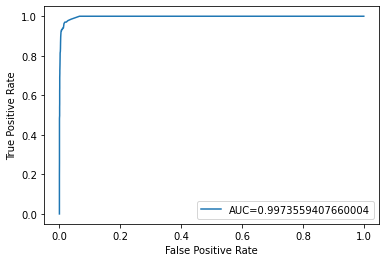

In [18]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
print('ROC, AUC for Testing set')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [19]:
training_misclassifcation=1-metrics.accuracy_score(y_train, y_train_pred)
print('Misclassification for Training set - ',round(training_misclassifcation,4))
training_misclassifcation=1-metrics.accuracy_score(y_test, y_pred)
print('Misclassification for Test set - ',round(training_misclassifcation,4))

Misclassification for Training set -  0.0
Misclassification for Test set -  0.0083


In [20]:
clfoob = RandomForestClassifier(n_estimators = 50, oob_score=True) 
clfoob.fit(X_train, y_train)
oob_error = 1 - clfoob.oob_score_
oob_error

0.00642857142857145

Out-of-bag error - 0.00642857142857145

Test Error - 0.0083

Out-of-bag error is slightly less that the test error

## 1. (d) Random Forest Classifier with balanced classes

The random forest model is built on decision trees, and decision trees are sensitive to class imbalance. Each tree is built on a "bag", and each bag is a uniform random sample from the data (with replacement). Therefore each tree will be biased in the same direction and magnitude (on average) by class imbalance.

However, several techniques exist for mitigating imbalance in classification tasks.

Random forests are amenable to at least two kinds of class weighting. The first technique is to weight the tree splitting criterion. The other technique is to either oversample or undersample data points during the bootstrap sampling process.

In Python, weighted tree splitting is implemented in the Scikit-learn class RandomForestClassifier, as the class_weight parameter. Weighted bootstrap sampling is implemented in the Imbalanced-learn class BalancedRandomForestClassifier.

In [21]:
clfbal = RandomForestClassifier(n_estimators = 50, class_weight='balanced') 
clfbal.fit(X_train, y_train)
y_train_pred1 = clfbal.predict(X_train)
print("Train Accuracy with balanced class", metrics.accuracy_score(y_train, y_train_pred1))
y_pred1 = clfbal.predict(X_test)
print("Test Accuracy  with balanced class", metrics.accuracy_score(y_test, y_pred1))

Train Accuracy with balanced class 0.9999142857142858
Test Accuracy  with balanced class 0.9903333333333333


Confusion Matrix for Training set with balanced class


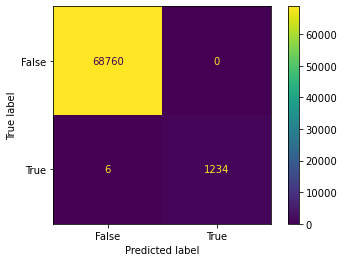

In [22]:
confusion_matrix_bal1 = metrics.confusion_matrix(y_train, y_train_pred1)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bal1, display_labels = [False, True])
print('Confusion Matrix for Training set with balanced class')
cm_display3.plot()
plt.show() 

Confusion Matrix for Test set with balanced class


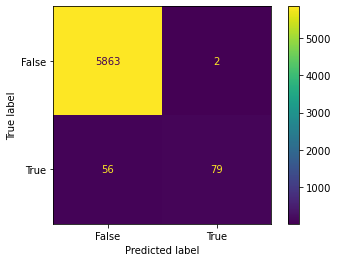

In [23]:
confusion_matrix1_bal2 = metrics.confusion_matrix(y_test, y_pred1)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1_bal2, display_labels = [False, True])
print('Confusion Matrix for Test set with balanced class')
cm_display4.plot()
plt.show() 

ROC, AUC for Training set with balanced class


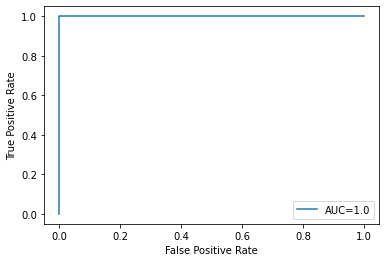

In [24]:
y_pred_train_proba_bal = clfbal.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_proba_bal)
auc = metrics.roc_auc_score(y_train, y_pred_train_proba_bal)
print('ROC, AUC for Training set with balanced class')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set with balanced class


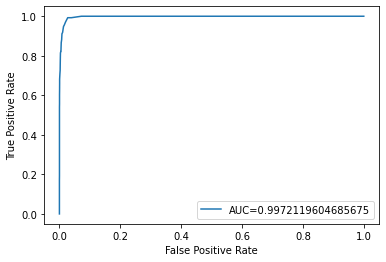

In [25]:
y_pred_proba_bal = clfbal.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_bal)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bal)
print('ROC, AUC for Testing set with balanced class')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [26]:
training_misclassifcation_bal=1-metrics.accuracy_score(y_train, y_train_pred1)
print('Misclassification for Training set with balanced class - ',round(training_misclassifcation_bal,4))
test_misclassifcation_bal=1-metrics.accuracy_score(y_test, y_pred1)
print('Misclassification for Test set - ',round(test_misclassifcation_bal,4))

Misclassification for Training set with balanced class -  0.0001
Misclassification for Test set -  0.0097


In [27]:
clfoobbal = RandomForestClassifier(n_estimators = 50, oob_score=True, class_weight='balanced') 
clfoobbal.fit(X_train, y_train)
oob_error_bal = 1 - clfoobbal.oob_score_
oob_error_bal

0.007757142857142907

##### Results with imbalance:
Train error - 0.0

Test error - 0.0083

AUC - 0.997355

Out-of-bag error - 0.0064

##### Results with balanced classes:
Train error - 0.0001

Train error - 0.0097

AUC - 0.99721

Out-of-bag error - 0.00775

## 1. (e) XGBoost

In [29]:
estimator = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
parameters = {'alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]}
grid_search = GridSearchCV(estimator=estimator,param_grid=parameters,scoring = 'roc_auc',n_jobs = 5,cv = 5,verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=5,
             param_grid={'alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]},
             scoring='roc_auc', verbose=True)

In [30]:
print("\n The best parameters across ALL searched params:\n",grid_search.best_params_)


 The best parameters across ALL searched params:
 {'alpha': 0.001}


In [37]:
xgb = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42,alpha=0.001)
xgb.fit(X_train, y_train)
y_train_xgb_pred = xgb.predict(X_train)
predictions = [round(value) for value in y_train_xgb_pred]
accuracy = metrics.accuracy_score(y_train, predictions)
print("Train error: ",round((1-accuracy),6))
y_test_xgb_pred = xgb.predict(X_test)
predictions1 = [round(value) for value in y_test_xgb_pred]
accuracy = metrics.accuracy_score(y_test, predictions1)
print("Train error: ",round((1-accuracy),5))

Train error:  1.4e-05
Train error:  0.0055


Confusion Matrix for Training set with XGB


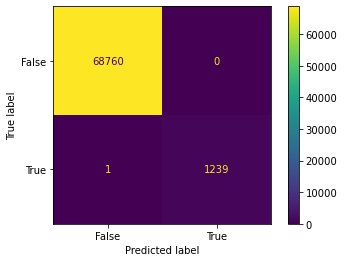

In [39]:
confusion_matrix_bal1 = metrics.confusion_matrix(y_train, predictions)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bal1, display_labels = [False, True])
print('Confusion Matrix for Training set with XGB')
cm_display3.plot()
plt.show() 

Confusion Matrix for Test set with XGB


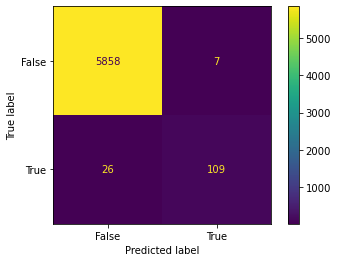

In [40]:
confusion_matrix1_bal2 = metrics.confusion_matrix(y_test, predictions1)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1_bal2, display_labels = [False, True])
print('Confusion Matrix for Test set with XGB')
cm_display4.plot()
plt.show() 

ROC, AUC for Training set with XGB


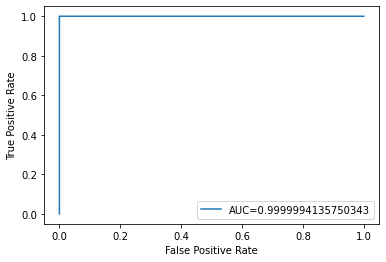

In [41]:
y_pred_train_proba_bal = xgb.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_proba_bal)
auc = metrics.roc_auc_score(y_train, y_pred_train_proba_bal)
print('ROC, AUC for Training set with XGB')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set with XGB


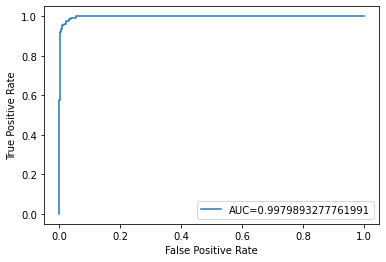

In [55]:
y_pred_proba_bal = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_bal)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bal)
print('ROC, AUC for Testing set with XGB')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## 1. (f) XGBoost using SMOTE

In [48]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['classifier', XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)]])

stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]}
grid_search1 = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)

grid_search1.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None,
                                                      predictor=None, ...)]]),
             n_jobs=5,
             param_grid={'classifier__alpha': [0, 0.001, 0.003, 0.005, 0.007,
                                               0.01]},
             scoring='roc_auc')

In [49]:
print("\n The best parameters across ALL searched params:\n",grid_search1.best_params_)


 The best parameters across ALL searched params:
 {'classifier__alpha': 0}


In [50]:
smote=SMOTE()
sm_trainX, sm_trainY = smote.fit_resample(X_train, y_train)
xgb1 = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42,alpha=0)
xgb1.fit(sm_trainX, sm_trainY)
y_train_xgb1_pred = xgb1.predict(X_train)
predictions2 = [round(value) for value in y_train_xgb1_pred]
accuracy = metrics.accuracy_score(y_train, predictions2)
print("Train error with SMOTE and best alpha val: ",round((1-accuracy),6))
y_test_xgb1_pred = xgb1.predict(X_test)
predictions3 = [round(value) for value in y_test_xgb1_pred]
accuracy = metrics.accuracy_score(y_test, predictions3)
print("Test error with SMOTE and best alpha val: ",round((1-accuracy),5))

Train error with SMOTE and best alpha val:  2.9e-05
Test error with SMOTE and best alpha val:  0.00733


Confusion Matrix for Training set with XGB using SMOTE and best alpha


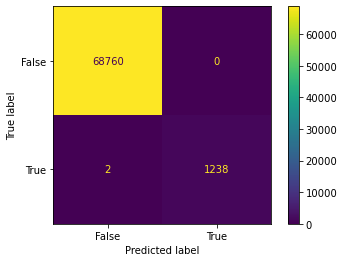

In [51]:
confusion_matrix_bal1 = metrics.confusion_matrix(y_train, predictions2)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_bal1, display_labels = [False, True])
print('Confusion Matrix for Training set with XGB using SMOTE and best alpha')
cm_display3.plot()
plt.show() 

Confusion Matrix for Test set with XGB using SMOTE and best alpha


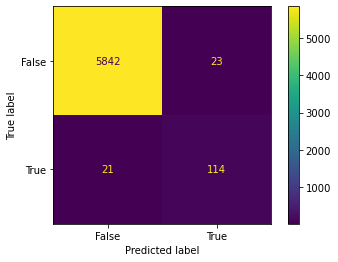

In [53]:
confusion_matrix1_bal2 = metrics.confusion_matrix(y_test, predictions3)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1_bal2, display_labels = [False, True])
print('Confusion Matrix for Test set with XGB using SMOTE and best alpha')
cm_display4.plot()
plt.show() 

ROC, AUC for Training set with XGB using SMOTE and best alpha


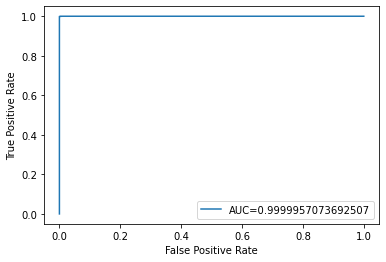

In [54]:
y_pred_train_proba_bal = xgb1.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_proba_bal)
auc = metrics.roc_auc_score(y_train, y_pred_train_proba_bal)
print('ROC, AUC for Training set with XGB using SMOTE and best alpha')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set with XGB using SMOTE and best alpha


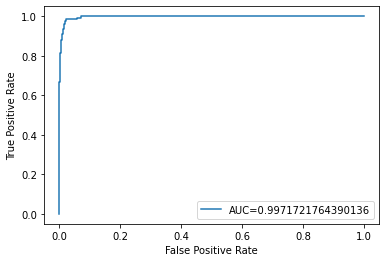

In [56]:
y_pred_proba_bal = xgb1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_bal)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bal)
print('ROC, AUC for Testing set with XGB using SMOTE and best alpha')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### XGBoost without SMOTE
Train error:  1.4e-05

Train error:  0.0055

#### XGBoost with SMOTE
Train error with SMOTE and best alpha val:  2.9e-05

Test error with SMOTE and best alpha val:  0.00733

XGBoost with SMOTE is slightly less overfit and hence would have a slightly better performance